In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
births_data = pd.read_csv('./data/us-births.csv', delimiter=";")

In [6]:
births_data.shape

(3652, 6)

In [3]:
births_data.head(10)

,year,month,day,day_of_week,gender,births
0,1994,1,1,6,F,8096
1,1994,1,2,7,M,7772
2,1994,1,3,1,F,10142
3,1994,1,4,2,M,11248
4,1994,1,5,3,F,11053
5,1994,1,6,4,M,11406
6,1994,1,7,5,F,11251
7,1994,1,8,6,M,8653
8,1994,1,9,7,F,7910
9,1994,1,10,1,M,10498


In [8]:
births_data.tail()

,year,month,day,day_of_week,gender,births
3647,2003,12,27,6,M,8646
3648,2003,12,28,7,F,7645
3649,2003,12,29,1,M,12823
3650,2003,12,30,2,F,14438
3651,2003,12,31,3,M,12374


In [12]:
# operamos con la columna births, la funcion a aplicar sera la suma
# la agrupacion por filas sera por año
# mostrara en las columnas los posibles generos
births_data.pivot_table('births', index=['year'], columns=['gender'], aggfunc='sum')

gender,F,M
year,,
1994,1981024,1971743
1995,1947532,1952057
1996,1949850,1941644
1997,1944594,1936300
1998,1965260,1976293
1999,1980132,1979285
2000,2025019,2033795
2001,2005738,2020195
2002,2011645,2010081


In [48]:
# agragamos una columna de tipo serie, pasandole el año y obteniendo el cociente diviendolo por 10 para obtener la decada
births_data['decade'] = (births_data['year'] // 10)*10
births_data.head()

,year,month,day,day_of_week,gender,births,day_of_week_2,decade
1994-01-01,1994,1,1,6,F,8096,5,1990
1994-01-02,1994,1,2,7,M,7772,6,1990
1994-01-03,1994,1,3,1,F,10142,0,1990
1994-01-04,1994,1,4,2,M,11248,1,1990
1994-01-05,1994,1,5,3,F,11053,2,1990


In [18]:
# sumatoria de nacimientos, mostrada por decadas y por su genero
births_data.pivot_table(['births'], index=['decade'], columns=['gender'], aggfunc='sum')

births          
gender         F         M
decade                    
1990    11768392  11757322
2000     8081977   8114446

In [4]:
# Para que formatie correctamente las graficas
%matplotlib inline
sb.set()

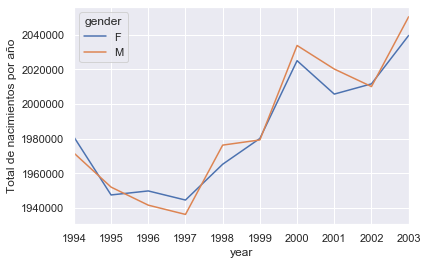

In [25]:
# . plot() grafica la tabla pivote
births_data.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
# Agregando una etiqueta en el eje Y
plt.ylabel("Total de nacimientos por año")
plt.show()

In [26]:
quartiles = np.percentile(births_data['births'], [25,50,75])
quartiles

array([ 8844.5 , 11615.  , 12274.25])

In [27]:
# Obteniedno de forma manual la mediana
med = quartiles[1]
IQR = quartiles[2]-quartiles[0]
sig = 0.75*IQR

In [36]:
# Seteando el tipo para una columna del dataframe
births_data['day'] = births_data['day'].astype(int)
births_data

,year,month,day,day_of_week,gender,births
0,1994,1,1,6,F,8096
1,1994,1,2,7,M,7772
2,1994,1,3,1,F,10142
3,1994,1,4,2,M,11248
4,1994,1,5,3,F,11053
5,1994,1,6,4,M,11406
6,1994,1,7,5,F,11251
7,1994,1,8,6,M,8653
8,1994,1,9,7,F,7910
9,1994,1,10,1,M,10498


In [41]:
# Formateando los indices para cada fila
# algoritmo para concatenar correctamente año-mes-dia
births_data.index = pd.to_datetime(10000*births_data.year + 100 * births_data.month + births_data.day, format="%Y%m%d")

In [40]:
births_data.head()

,year,month,day,day_of_week,gender,births
1994-01-01,1994,1,1,6,F,8096
1994-01-02,1994,1,2,7,M,7772
1994-01-03,1994,1,3,1,F,10142
1994-01-04,1994,1,4,2,M,11248
1994-01-05,1994,1,5,3,F,11053


In [42]:
# Al ser de tipo date el index, podemos usar funciones de pandas para el dataframe de tiempo
# para este caso extrae el dia de la semana con dayofweek
births_data['day_of_week_2'] = births_data.index.dayofweek

In [43]:
births_data.head()

,year,month,day,day_of_week,gender,births,day_of_week_2
1994-01-01,1994,1,1,6,F,8096,5
1994-01-02,1994,1,2,7,M,7772,6
1994-01-03,1994,1,3,1,F,10142,0
1994-01-04,1994,1,4,2,M,11248,1
1994-01-05,1994,1,5,3,F,11053,2


In [49]:
# Media de nacimientos, por dia de la semana para las decadas existentes
births_data.pivot_table('births', index='day_of_week', columns='decade', aggfunc='mean')

decade,1990,2000
day_of_week,,
1,10878.507987,11407.622010
2,12139.750799,12662.459330
3,11895.683706,12437.827751
4,11817.207668,12450.206731
5,11732.313099,12314.629808
6,8770.523962,8693.478469
7,7928.038339,7647.114833


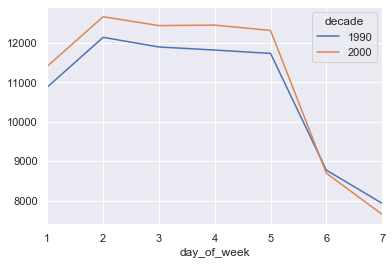

In [50]:
births_data.pivot_table('births', index='day_of_week', columns='decade', aggfunc='mean').plot()

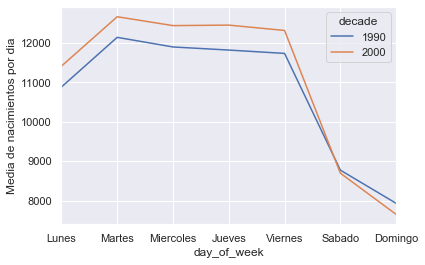

In [53]:
births_data.pivot_table('births', index='day_of_week', columns='decade', aggfunc='mean').plot()
# añadiendo etiquetas para entender mejor los dias de la semana
plt.gca().set_xticklabels(['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo' ])
plt.ylabel('Media de nacimientos por dia')
plt.show()

In [55]:
# Al ser de tipo date, podemos acceder a sus diferentes propiedades
# births_data.index.month
# births_data.index.day
births_by_date = births_data.pivot_table('births', [births_data.index.month, births_data.index.day], aggfunc='mean')
births_by_date.head(10)
# Muestra los nacimientos agrupamos por el mes y luego por los dias del mes

births
1 1    8018.5
  2    9184.3
  3   10547.9
  4   10663.0
  5   10493.6
  6   10561.3
  7   10640.7
  8   10479.7
  9   10333.8
  10  10936.7

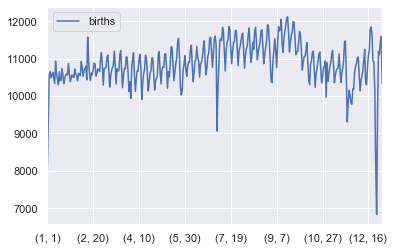

In [56]:
births_by_date.plot()

## Ejercicio de repaso de agrupacion de datos cuantitativos


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ages = pd.Series([1,1,3,5,6,8,9,10,12,15,18,18,18,20,25,30,40,51,52])
# divisiones o agrupaciones
# np.inf => representaria todos los numeros siguientes al infinito
bins = (0,10,15,18,21, np.inf)
# Etiquetas que se colocaran a la agrupacion
labels = ('infancia', 'preadolescencia', 'adolescencia', 'universitario', 'adulto')
#  pd.cut(ages, bins=bins, labels = labels
#  pd.cut(coleccion, bins=agrupacion de la segmentacion, labels = etiquetas a cambiar por la agrupacion)
agrupacion = pd.cut(ages, bins=bins, labels = labels)
agrupacion

0            infancia
1            infancia
2            infancia
3            infancia
4            infancia
5            infancia
6            infancia
7            infancia
8     preadolescencia
9     preadolescencia
10       adolescencia
11       adolescencia
12       adolescencia
13      universitario
14             adulto
15             adulto
16             adulto
17             adulto
18             adulto
dtype: category
Categories (5, object): [infancia < preadolescencia < adolescencia < universitario < adulto]

In [14]:
# concatenando n cantidad de series
# concat((serie1, serie2), axis=eje 1 = filas)
# .rename(columnas=dict{}) # permite renombrar las columnas para su mayor comprension
df1 = pd.concat((ages, agrupacion), axis=1).rename(columns={0:'age', 1: 'agrupacion'})
df1

,age,agrupacion
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolescencia
9,15,preadolescencia


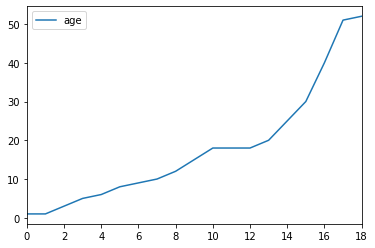

In [21]:
df1.plot()


In [12]:
# Arroja la frecuencia absoluta para cada dato de la agrupacion
agrupacion.value_counts()

infancia           8
adulto             5
adolescencia       3
preadolescencia    2
universitario      1
dtype: int64